In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, GlobalMaxPooling2D,MaxPooling2D, Dropout,Dense, Flatten, Activation
from tensorflow.keras.callbacks  import ReduceLROnPlateau,EarlyStopping

In [2]:

mypath='/content/drive/MyDrive/project/pro'

# Count the number of subfolders
num_subfolders = sum(os.path.isdir(os.path.join(mypath, name)) for name in os.listdir(mypath))

print(f"Number of subfolders: {num_subfolders}")

Number of subfolders: 5


In [3]:
path_test = mypath

CATEGORIES = os.listdir(path_test) # Automatically extract categories from subfolders within the path

CATEGORIES

['bishop_resized',
 'Rook-resize',
 'pawn_resized',
 'knight-resize',
 'Queen-Resized']

In [4]:
#createTrainingData() that reads images from different categories, resizes them,
#and appends the resized image and its corresponding class label to a list called training

training = []
def createTrainingData():
    for category in CATEGORIES:
        path = os.path.join(path_test, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)

            if img_array is None:
                print(f"Unable to read image: {img_path}")
                continue

            new_array = cv2.resize(img_array, (150, 150))
            training.append([new_array, class_num])

createTrainingData()

In [5]:


np.random.shuffle(training)

X = []
y = []
for features, label in training:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, 150, 150, 3)

X = X.astype('float32') / 255.0
Y = to_categorical(y, num_classes=num_subfolders)


In [6]:
X.shape

(651, 150, 150, 3)

In [7]:
model = Sequential()

model.add(Conv2D(4, (3,3), input_shape=(150,150,3)))

model.add(Activation('relu'))

model.add(MaxPooling2D((2,2)))


model.add(Conv2D(8, (3,3)))

model.add(Activation('relu'))

model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(3000, activation='relu'))

model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))

model.add(Activation('sigmoid'))
model.add(Dense(num_subfolders,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)
callbacks = tf.keras.callbacks. EarlyStopping (monitor='loss', patience=10)

#learning_rate_reduction = ReduceLROnPlateau(monitor='val_mean_squared_error', patience=3, verbose=1,
                                           # factor=0.5, min_lr=0.00001)

In [9]:
 model.fit(X,Y,epochs=50)

Epoch 1/50
21/21 [==============================] - 7s 33ms/step - loss: 1.8320 - accuracy: 0.2151
Epoch 2/50
21/21 [==============================] - 0s 23ms/step - loss: 1.6269 - accuracy: 0.2104
Epoch 3/50
21/21 [==============================] - 0s 23ms/step - loss: 1.7036 - accuracy: 0.2412
Epoch 4/50
21/21 [==============================] - 0s 21ms/step - loss: 1.6654 - accuracy: 0.2442
Epoch 5/50
21/21 [==============================] - 0s 19ms/step - loss: 1.6234 - accuracy: 0.2197
Epoch 6/50
21/21 [==============================] - 0s 19ms/step - loss: 1.6276 - accuracy: 0.2627
Epoch 7/50
21/21 [==============================] - 0s 19ms/step - loss: 1.6260 - accuracy: 0.2181
Epoch 8/50
21/21 [==============================] - 0s 19ms/step - loss: 1.6295 - accuracy: 0.2273
Epoch 9/50
21/21 [==============================] - 0s 19ms/step - loss: 1.6548 - accuracy: 0.1935
Epoch 10/50
21/21 [==============================] - 0s 18ms/step - loss: 1.6495 - accuracy: 0.2627
Epoch 11/

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 4)       112       
                                                                 
 activation (Activation)     (None, 148, 148, 4)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 8)         296       
                                                                 
 activation_1 (Activation)   (None, 72, 72, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 8)         0         
 g2D)                                                   

In [11]:
pr="/content/drive/MyDrive/project/th.jpeg"

In [12]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path):
    image = load_img(image_path, target_size=(150, 150))  # Adjust target_size as needed
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

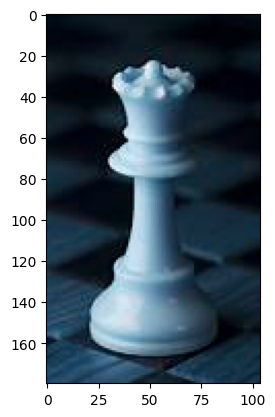

In [13]:
plt.imshow(cv2.imread(pr))

In [14]:
prd=preprocess_image(pr)
z=np.argmax(model.predict(prd))

1/1 [==============================] - 0s 230ms/step


In [15]:
print("the predicted piece is:",CATEGORIES[z])

the predicted piece is: Queen-Resized


In [16]:
p="/content/drive/MyDrive/project/pawn-chess-piece.jpg"

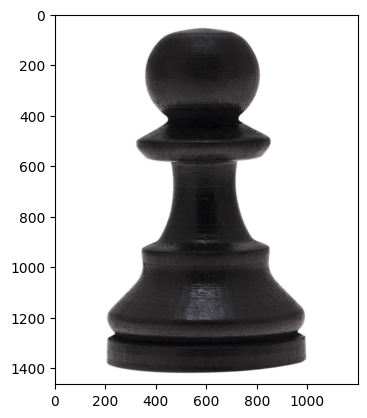

In [17]:
plt.imshow(cv2.imread(p))

In [18]:
prd=preprocess_image(p)
z=np.argmax(model.predict(prd))
print("the predicted piece is:",CATEGORIES[z])

1/1 [==============================] - 0s 19ms/step
the predicted piece is: pawn_resized


In [19]:
loss, acc = model.evaluate(X,Y, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.011798768304288387
Test Accuracy: 0.9938555955886841


In [20]:
# plt.imshow(prd[0, :, :, 0], cmap='gray')  # Assuming it's a grayscale image
# plt.axis('off')  # Turn off axis labels
# plt.show()

In [21]:
#  from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
#  save_model(model, '/content/drive/MyDrive/project/train/chesspie')

In [25]:
#  from tensorflow.keras.models import load_model
#  load_model=load_model('/content/drive/MyDrive/project/train/chesspie')

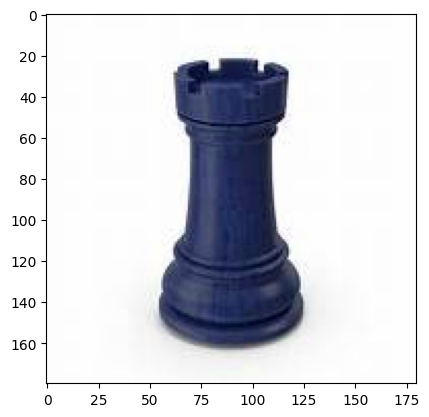

In [23]:
s="/content/drive/MyDrive/project/rook.jpeg"
plt.imshow(cv2.imread(s))

In [24]:
prd=preprocess_image(s)
z=np.argmax(model.predict(prd))
print("the predicted piece is:",CATEGORIES[z])

1/1 [==============================] - 0s 20ms/step
the predicted piece is: Rook-resize


In [27]:

from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
model_path = '/content/drive/MyDrive/project/neww'  # Specify the complete file path with extension
save_model(model, model_path)
